**Zadanie 0.** (2 punkty)<br/>
Kilka popularnych algorytmów grupowania danych dost
ę
pnych jest w pakiecie SciKit do Pythona. 
Zapoznaj si
ę
 z nimi wykonuj
ą
c skrypt umieszczony w materiałach do wykładu. <br/>
a) Jakie znaczenie ma parametr n_init w implementac
ji algorytmu KMeans? Powtórz obliczenia  z 
ró
ż
nymi warto
ś
ciami tego parametru i przeanalizuj wyniki. <br/>
b) Jakie znaczenie ma parametr threshold w implemen
tacji algorytmu Birch? Powtórz obliczenia z 
ró
ż
nymi warto
ś
ciami tego parametru i przeanalizuj wyniki. <br/>
c)  Jakie  znaczenie  ma  parametr  eps  w  implementacji 
algorytmu  DBScan?  Powtórz  obliczenia  z 
ró
ż
nymi warto
ś
ciami tego parametru i przeanalizuj wyniki. <br/>
d)  Rozszerz  skrypt  tak,  aby  na  rysunkach  z  wynikami
  algorytmu  DBScan  widoczne  były  tak
ż
e 
punkty danych nie przypisane przez algorytm do 
ż
adnej grupy. <br/>
e) Wyniki grupowania danych IRIS s
ą
 pokazywane na rysunkach dla dwóch pierwszych cech.
 Zrób 
rysunki dla pozostałych par cech. <br/>
f) Rozszerz skrypt tak, aby oceniał ka
ż
de wykonane grupowanie danych wska
ź
nikami poprawno
ś
ci 
grupowania, takimi jak Silhouette Coefficient, Dunn
 Index oraz Davies-Bouldin Index. <br/>
**Wskazówka:**
Silhouette 
Coefficient 
jest 
dost
ę
pny 
w 
pakiecie 
SciKit 
(http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient),   definicje   pozostałych   wska
ź
ników   mo
ż
na 
znale
źć
 w literaturze i nale
ż
y zaimplementowa
ć
 samemu. 

In [27]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn import metrics

In [28]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels, dunn=True):
    plt_colors = cycle(colors.cnames.keys())
    plt_K = np.unique(plt_labels).size
    cluster_diameters = []
    cluster_centroids = []
    
    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        if(dunn==True):
            cluster_diameters.append(calc_diameter(X[mask]))
            cluster_centroids.append(calc_cluster_centroid(X[mask]))
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

    plt.show()
    if(dunn==True):
        min_inter_cluster_dist = calc_min_inter_dist(np.array(cluster_centroids))
        max_cluster_diameter = max(cluster_diameters)
        dunn = min_inter_cluster_dist/max_cluster_diameter
        print('Dunn Index: ', dunn)
    
def calc_diameter(cluster):
    ones = np.ones((cluster.shape[0], cluster.shape[0]))
    
    X = cluster[:,0]
    XT = X.reshape(-1,1)
    SX = np.multiply(ones, X)
    resX = (SX-XT)**2
    
    Y = cluster[:,1]
    YT = Y.reshape(-1,1)
    SY = np.multiply(ones, Y)
    resY = (SY-YT)**2
    
    return np.sqrt((resX + resY).max())

def calc_min_inter_dist(centers):
    ones = np.ones((centers.shape[0], centers.shape[0]))
    inf_diag = np.diag(np.diag(np.ones((centers.shape[0],centers.shape[0]))*np.inf))
    
    X = centers[:,0]
    XT = X.reshape(-1,1)
    SX = np.multiply(ones, X)
    resX = (SX-XT)**2
    
    Y = centers[:,1]
    YT = Y.reshape(-1,1)
    SY = np.multiply(ones, Y)
    resY = (SY-YT)**2
    
    return np.sqrt((resX + resY+inf_diag).min())

def calc_cluster_centroid(cluster):
    X = cluster[:,0]
    Y = cluster[:,1]
    X_center = (X.sum())/cluster.shape[0]
    Y_center = (Y.sum())/cluster.shape[0]
    return [X_center, Y_center]


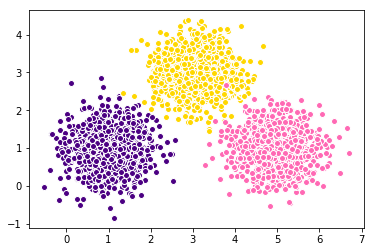

('Dunn Index: ', 0.74964079727753341)
Silhouette score:


0.670664355488093

In [29]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]

X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

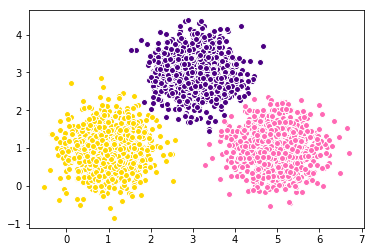

('Dunn Index: ', 0.7499978270599359)
Silhouette score:


0.67204859352098578

In [30]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(X)

labels = k_means.labels_
plotClustering(X, k_means.labels_)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

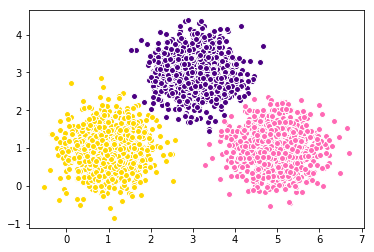

('Dunn Index: ', 0.75014783593008372)
Silhouette score:


0.67202097146691886

In [31]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

labels = mini_batch_k_means.labels_
plotClustering(X, mini_batch_k_means.labels_)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

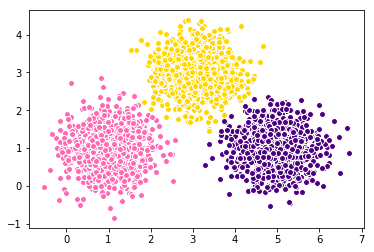

('Dunn Index: ', 0.7499978270599359)
Silhouette score:


0.67204859352098578

In [32]:
birch = Birch(threshold=1.08, n_clusters=None)
birch.fit(X)

labels = birch.labels_
plotClustering(X, birch.labels_)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

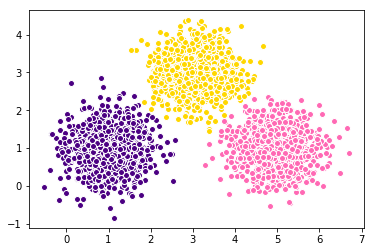

('Dunn Index: ', 0.7499978270599359)
Silhouette score:


0.67204859352098578

In [33]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

labels = birch.labels_
plotClustering(X, birch.labels_)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

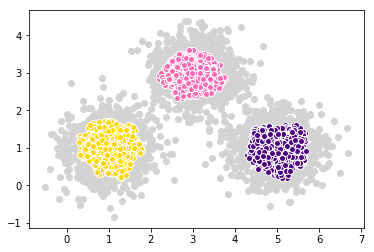

Silhouette score:


0.27303155554558661

In [34]:
dbscan = DBSCAN(eps=0.15, min_samples=25)
res = dbscan.fit(X)

mask = np.empty(shape=[0,2])
for i in range(X.size/2):
        if(i not in dbscan.core_sample_indices_):
            mask = np.append(mask, [X[i]], axis=0)

plt.scatter(mask[:,0], mask[:,1], c='lightgray')

labels = res.labels_
plotClustering(X, dbscan.labels_, dunn=False)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

In [35]:
from sklearn import datasets
import copy
iris = datasets.load_iris()
X = iris.data

In [36]:
def IrisClustering(X, plt_labels, birch=None):
    fig, axes = plt.subplots(2, 3)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size
    #print('pltk: ', plt_K)
    #print('centroids: ', birch.root_.centroids_.shape[0])
    
    if(birch):
        centroids = birch.root_.centroids_
        print(centroids)
    
    for j in range(4):
        for i in range(j):
            Y = X[:, [i,j]]
            for k in xrange(plt_K):
                color = plt_colors.next()
                mask = (plt_labels == k)
                feature_x = iris.feature_names[i]
                feature_y = iris.feature_names[j]
                if(i+j>4):
                    new_i=1
                    new_j=1
                else:
                    new_i=i
                    new_j=j
                axes[new_i, new_j-1].set_xlabel(feature_x)
                axes[new_i, new_j-1].set_ylabel(feature_y)
                if(birch):
                    axes[new_i, new_j-1].plot(centroids[:,i], centroids[:,j], 'w', markerfacecolor='red', marker='o', markersize=12)
                axes[new_i, new_j-1].plot(Y[mask, 0], Y[mask, 1], 'w', markerfacecolor=color, marker='o')
    plt.show()

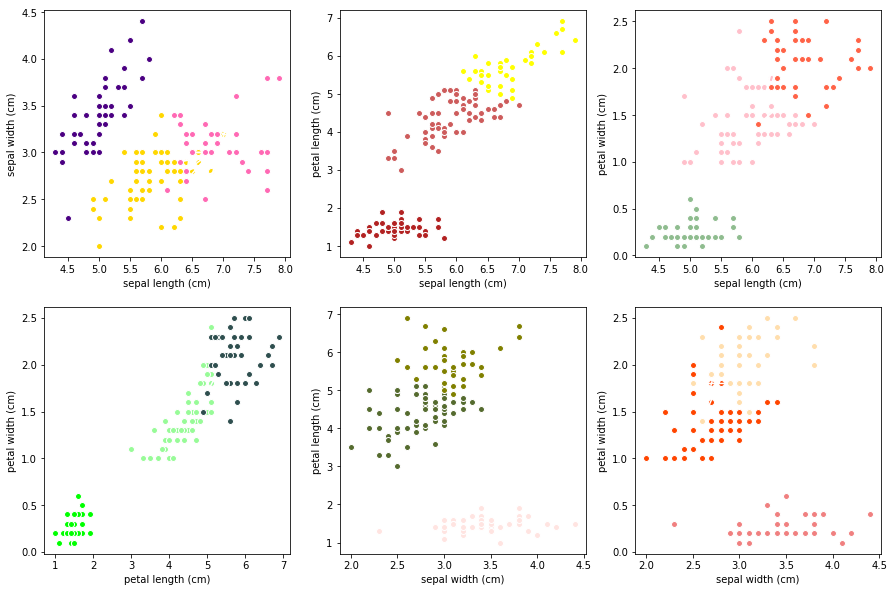

Silhouette score:


0.55259194453090321

In [37]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)
labels = k_means.labels_
IrisClustering(X, labels)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

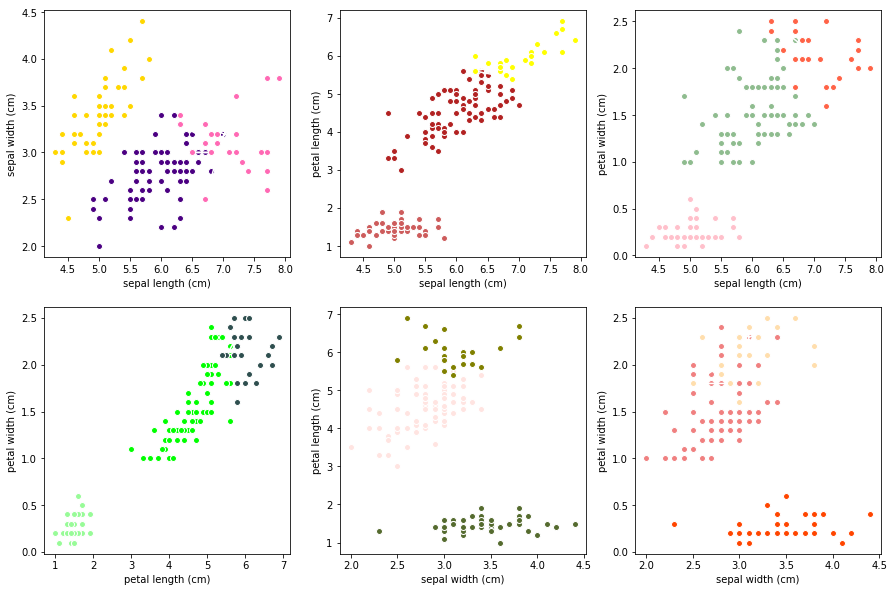

Silhouette score:


0.53526917761157444

In [38]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

labels = birch.labels_
IrisClustering(X, labels)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

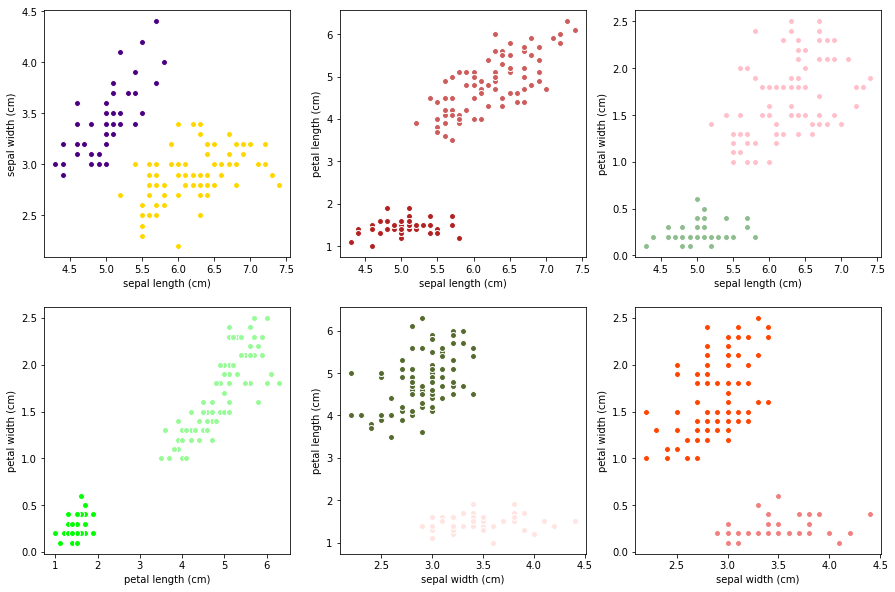

Silhouette score:


0.4858423545842489

In [39]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_
IrisClustering(X, labels)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

**Odpowiedzi:**<br/>
a) n_init : int, default: 10<br/>
    
    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
b) threshold : float, default 0.5 <br/>

    The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.
c) eps : float, optional

    The maximum distance between two samples for them to be considered as in the same neighborhood.



**Zadanie 1.** (2 punkty) <br/>
Zapoznaj    si
ę
    dokładniej    z    implementacj
ą
    algorytmu    BIRCH    w    SciKit    (http://scikit-learn.org/stable/modules/clustering.html#birch). <br/>
a)  Wykonaj  grupowanie  z  niski
ą
  warto
ś
ci
ą
  parametru  threshold  (na  przykład  0.25).  Algorytm 
utworzy wówczas du
ż
o grup danych (zazwyczaj wi
ę
cej ni
ż
 potrzeba). <br/>
b)  Zrób  nowy  rysunek  wyników  algorytmu  BIRCH.  Zazna
cz  na  nim  pozycje  centrów  grup 
przypisanych  do  korzenia  utworzonego  drzewa  grupowa
nia  (korze
ń
  drzewa  zapisany  jest  w 
birch.root_,  za
ś
  centra  w  birch.root_.centroids_)  oraz  punkty  danyc
h  w  kolorach  odpowiadaj
ą
cym 
utworzonym  grupom.  Je
ś
li  utworzone  drzewo  grupowania  ma  wi
ę
cej  poziomów,  to  zrób  jeszcze 
rysunek dla grupowania na poziomie ni
ż
ej ni
ż
 korze
ń
. <br/>
c) Jakie znaczenie ma parametr n_clusters? Czym ró
ż
ni si
ę
 n_clusters =None od n_clusters = 3? 

[[ 5.04509804  3.41372549  1.52745098  0.26666667]
 [ 6.23018868  2.84716981  4.86603774  1.63207547]
 [ 5.445       2.6         3.855       1.2       ]
 [ 6.77727273  3.13181818  5.67272727  2.14090909]
 [ 7.75        3.05        6.525       2.15      ]]


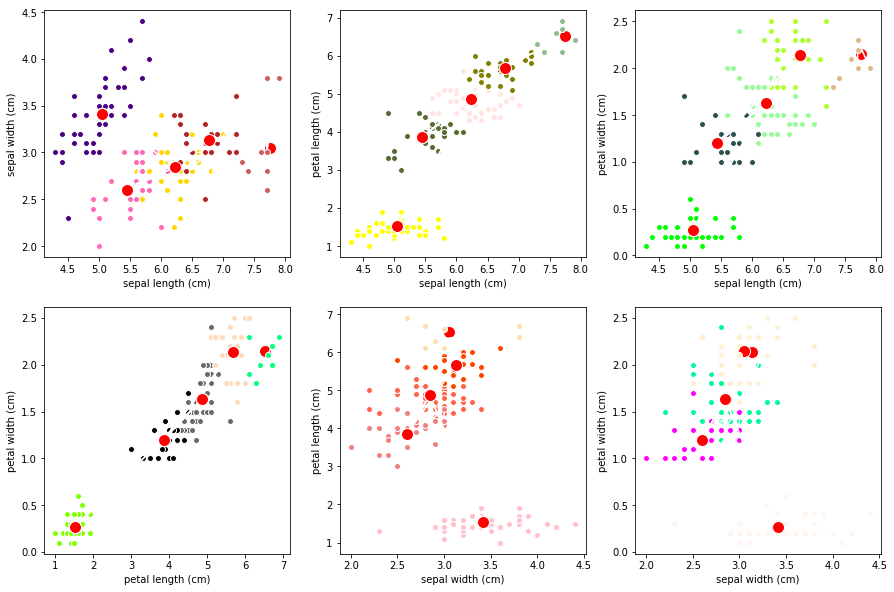

Silhouette score:


0.48943866930121571

In [54]:
X = iris.data
birch = Birch(threshold=0.9, n_clusters=None)
birch.fit(X)


labels = birch.labels_
IrisClustering(X, labels, birch=birch)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')


**c) Odpowiedź:** <br/>
    If n_clusters is set to None, the subclusters from the leaves are directly read off, otherwise a global clustering step labels these subclusters into global clusters (labels) and the samples are mapped to the global label of the nearest subcluster.

**Zadanie 2.** (2 punkty) <br/>
Normalizacja danych to przeskalowanie oryginalnych 
zarejestrowanych warto
ś
ci cech na warto
ś
ci 
z przedziału [0, 1] dokonywane za pomoc
ą
 przekształcenia x’ = (x – x
min
) / (x
max
 – x
min
), gdzie x’ to 
przeskalowana  warto
ść
,  x  to  warto
ść
  oryginalna,  za
ś
  x
min
  i  x
max
  to  odpowiednio  minimalna  i 
maksymalna zarejestrowana warto
ść
 cechy (normalizacji dokonuje si
ę
 dla ka
ż
dej cechy osobno). <br/>
Standaryzacja danych to przeskalowanie oryginalnych
 zarejestrowanych warto
ś
ci cech na warto
ś
ci 
o  rozkładzie  N(0,  1)  dokonywane  za  pomoc
ą
  przekształcenia  x’  =  (x  –  m)  /  s,  gdzie  x’  to 
przeskalowana  warto
ść
,  x  to  warto
ść
  oryginalna,  za
ś
  m  i  s  to  odpowiednio 
ś
rednia  i  odchylenie 
standardowe  zarejestrowanych  warto
ś
ci  cechy  (standaryzacji  dokonuje  si
ę
  dla  ka
ż
dej  cechy 
osobno). <br/>
Czy  normalizacja  lub  standaryzacja  danych  mo
ż
e  mie
ć
  wpływ  na  działanie  algorytmu  K-Means? 
Je
ś
li    tak,    to    skonstruuj    proste    przykłady    pokazuj
ą
ce, 
ż
e    dane    znormalizowane    lub 
ustandaryzowane  s
ą
  lepiej  grupowane  ni
ż
  dane  oryginalne.  Zrób  stosowne  rysunki.  A  jak  jest
  w 
przypadku algorytmów BIRCH i DBScan? 

In [55]:
def normalize(X):
    minx = X.min()
    maxx = X.max()
    norm_X = (X-minx)*1.0/(maxx-minx)
    return norm_X

def standardize(X):
    m = X.mean()
    s = X.std()
    stand_X = (X-m)/s
    return stand_X

X = iris.data[:,[0,3]]

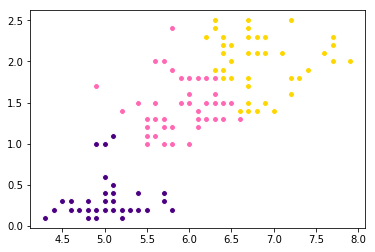

('Dunn Index: ', 0.63547950437585665)
Silhouette score:


0.50513091064611559

In [60]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)
labels = k_means.labels_
plotClustering(X, labels)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

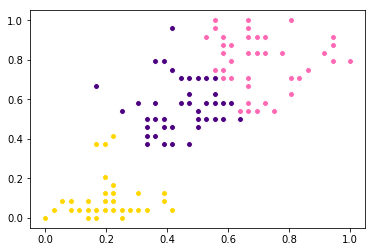

('Dunn Index: ', 0.59784161498794353)
Silhouette score:


0.51130119941903829

In [130]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)
norm_X = np.empty([150, 2])

for i in range (X.shape[1]):
    norm_X[:,i] = normalize(X[:,i])

labels = k_means.labels_
plotClustering(norm_X, labels)
print('Silhouette score:')
metrics.silhouette_score(norm_X, labels, metric='euclidean')

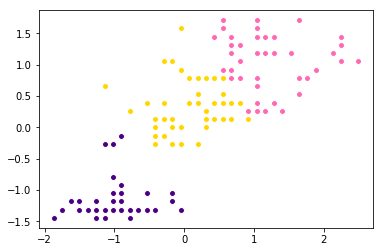

('Dunn Index: ', 0.6461196845339412)
Silhouette score:


0.5072995536137741

In [131]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)
stand_X = np.empty([150, 2])

for i in range (X.shape[1]):
    stand_X[:,i] = standardize(X[:,i])

labels = k_means.labels_
plotClustering(stand_X, labels)
print('Silhouette score:')
metrics.silhouette_score(stand_X, labels, metric='euclidean')

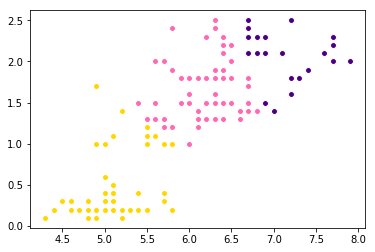

('Dunn Index: ', 0.6483212220777359)
Silhouette score:


0.47840421997900201

In [132]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

labels = birch.labels_
plotClustering(X, birch.labels_)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

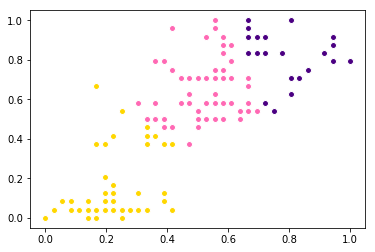

('Dunn Index: ', 0.50157337211867226)
Silhouette score:


0.46198514468756535

In [133]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

for i in range (X.shape[1]):
    norm_X[:,i] = normalize(X[:,i])

labels = birch.labels_
plotClustering(norm_X, birch.labels_)
print('Silhouette score:')
metrics.silhouette_score(norm_X, labels, metric='euclidean')

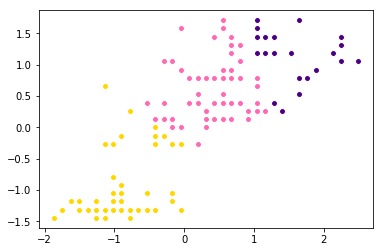

('Dunn Index: ', 0.61824927725850554)
Silhouette score:


0.47560186949711619

In [134]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

for i in range (X.shape[1]):
    stand_X[:,i] = standardize(X[:,i])

labels = birch.labels_
plotClustering(stand_X, birch.labels_)
print('Silhouette score:')
metrics.silhouette_score(stand_X, labels, metric='euclidean')

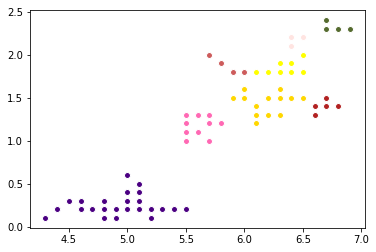

Silhouette score:


0.236584760217602

In [135]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
res = dbscan.fit(X)

labels = res.labels_
plotClustering(X, dbscan.labels_, dunn=False)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

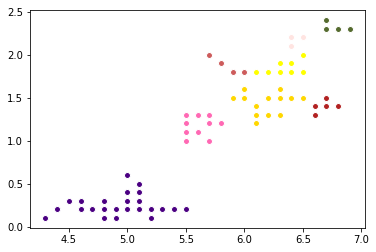

Silhouette score:


0.236584760217602

In [136]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
res = dbscan.fit(X)

for i in range (X.shape[1]):
    norm_X[:,i] = normalize(X[:,i])

labels = res.labels_
plotClustering(X, dbscan.labels_, dunn=False)
print('Silhouette score:')
metrics.silhouette_score(X, labels, metric='euclidean')

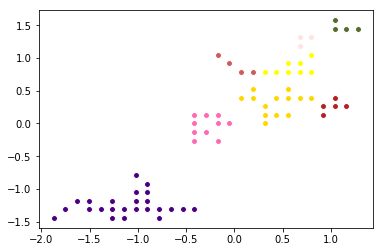

Silhouette score:


0.24029774108418461

In [137]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
res = dbscan.fit(X)

for i in range (X.shape[1]):
    stand_X[:,i] = standardize(X[:,i])

labels = res.labels_
plotClustering(stand_X, dbscan.labels_, dunn=False)
print('Silhouette score:')
metrics.silhouette_score(stand_X, labels, metric='euclidean')

In [148]:
h = np.array([ 167.08310262, 193.17468896, 156.72980758, 183.72326933])
w = np.array([ 71.74266252, 88.76819909, 68.38936749, 89.31677946])
l = np.array([0, 1, 0, 1])
people = np.vstack((h,w)).T

In [149]:
norm_X = np.empty([4, 2])
for i in range (people.shape[1]):
    norm_X[:,i] = normalize(people[:,i])

In [150]:
stand_X = np.empty([4, 2])
for i in range (people.shape[1]):
    stand_X[:,i] = standardize(people[:,i])

In [151]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=1)
res = k_means.fit(people)
labels = res.labels_

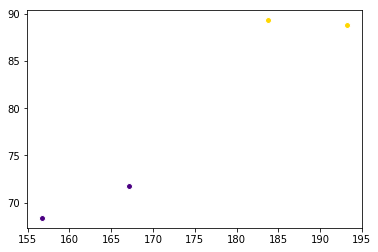

('Dunn Index: ', 2.998162156519053)
Silhouette score:


0.74648186186317755

In [152]:
plotClustering(people, labels)
print('Silhouette score:')
metrics.silhouette_score(norm_X, labels, metric='euclidean')

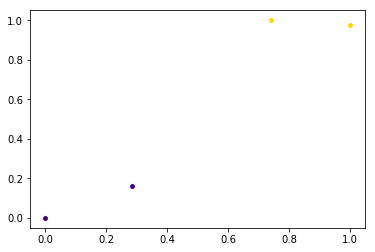

('Dunn Index: ', 3.5658990030280964)
Silhouette score:


0.74648186186317755

In [153]:
plotClustering(norm_X, labels)
print('Silhouette score:')
metrics.silhouette_score(norm_X, labels, metric='euclidean')

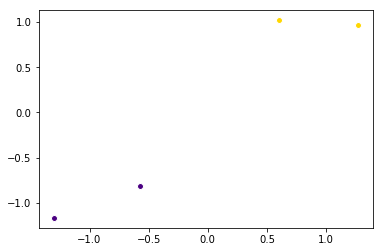

('Dunn Index: ', 3.3666904167354628)
Silhouette score:


0.72700121584954736

In [154]:
plotClustering(stand_X, labels)
print('Silhouette score:')
metrics.silhouette_score(stand_X, labels, metric='euclidean') 

**Zadanie 3.** (4 punkty) <br/>
W  pliku  APEX_OSD_V1_calibr_cube  znajduje  si
ę
  wielospektralne  zdj
ę
cie  satelitarne.  Zdj
ę
cie  ma 
rozmiar  1500  x  1000  pikseli,  ka
ż
dy  piksel  jest  opisany  przez  285  warto
ś
ci.  Pogrupuj  piksele tego 
zdj
ę
cia u
ż
ywaj
ą
c poznanych algorytmów grupowania danych. Sprawd
ź
 ró
ż
ne algorytmy i ró
ż
ne ich 
parametry,   uzyskane   grupowania   oce
ń
   stosuj
ą
c   wybrane   wska
ź
niki   poprawno
ś
ci.   Wyniki 
przedstaw w formie mapy terenu. Zastanów si
ę
, która z uzyskanych map jest najlepsza. <br/>
**Wskazówki:** <br/>
1.   Plik 
APEX_OSD_V1_calibr_cube 
znajduje 
si
ę
w 
folderze 
/pio/scratch/2/ED2015/APEX/ 
APEX_OSD_Package_1.0/APEX_OSD_Package_1.0    dost
ę
pnym    w    systemie    linux    na    (prawie 
wszystkich) komputerach w pracowniach 110 i 137. <br/>
2.   W   Matlabie   wielospektralne   zdj
ę
cie   satelitarne   mo
ż
na   wczyta
ć
   poleceniem   multibandread   z 
odpowiednimi parametrami. W przypadku zdj
ę
cia APEX mo
ż
na u
ż
y
ć
 poni
ż
szego kodu:  <br/>
    
    `ImageRaw = multibandread('APEX_OSD_V1_calibr_cube', [1500, 1000, 285], 'int16', 0, 'bsq', 'ieee-le'); `

In [1]:
import spectral as sp
from spectral import *
file_path = '/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr'
img = sp.open_image(file_path)
data = img.load()

In [12]:
(m, c) = kmeans(data, 20, 20)
# print (img)
# import spectral.io.envi as envi

Initializing clusters along diagonal of N-dimensional bounding box.
Iteration 1...  0.Iteration 1...1456043 pixels reassigned.
Iteration 2...  0.Iteration 2...566353 pixels reassigned.
Iteration 3...  0.Iteration 3...257783 pixels reassigned.
Iteration 4...  0.Iteration 4...123399 pixels reassigned.
Iteration 5...  0.Iteration 5...73558 pixels reassigned.
Iteration 6...  0.Iteration 6...62722 pixels reassigned.
Iteration 7...  0.Iteration 7...63384 pixels reassigned.
Iteration 8...  0.Iteration 8...62928 pixels reassigned.
Iteration 9...  0.Iteration 9...61089 pixels reassigned.
Iteration 10...  0.0Iteration 10...62088 pixels reassigned.
Iteration 11...  0.0Iteration 11...65213 pixels reassigned.
Iteration 12...  0.0Iteration 12...68943 pixels reassigned.
Iteration 13...  0.0Iteration 13...69478 pixels reassigned.
Iteration 14...  0.0Iteration 14...65276 pixels reassigned.
Iteration 15...  0.0Iteration 15...57367 pixels reassigned.
Iteration 16...  0.0Iteration 16...49910 pixels reassi

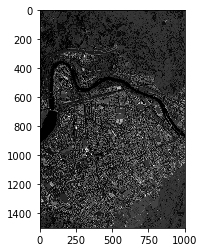

In [16]:
v = imshow(m, stretch_all=True)

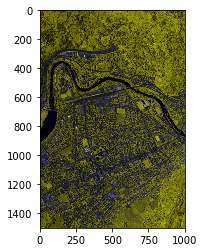

In [42]:
view = imshow(img, (100, 100, 6))